In [4]:

# Imports & dataset
import numpy as np
import matplotlib.pyplot as plt

# Reproducible toy dataset with a roughly linear trend
rng = np.random.default_rng(7)
X = np.linspace(0, 10, 20)
true_m, true_b = 2.3, 5.0
y = true_m * X + true_b + rng.normal(0, 3, size=X.size)

# OLS via NumPy (returns slope first, then intercept for degree=1)
m_hat, b_hat = np.polyfit(X, y, 1)
m_hat, b_hat


(np.float64(2.048373983878352), np.float64(5.308891370569917))

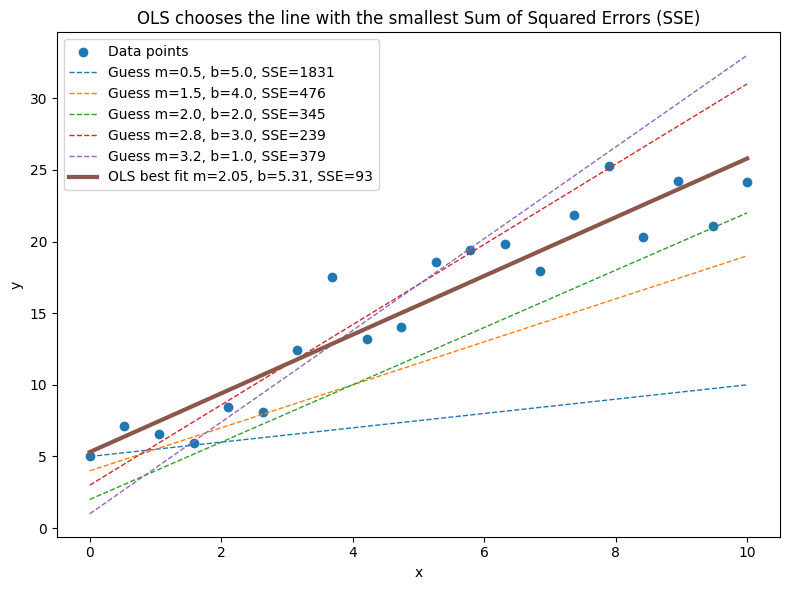

In [5]:

# Plot data + candidate lines + OLS best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data points")

# A few candidate (m, b) guesses to compare
candidates = [
    (0.5, 5.0),
    (1.5, 4.0),
    (2.0, 2.0),
    (2.8, 3.0),
    (3.2, 1.0),
]

xs = np.linspace(X.min(), X.max(), 100)
for m_try, b_try in candidates:
    y_try = m_try * xs + b_try
    sse = np.sum((y - (m_try * X + b_try))**2)
    plt.plot(xs, y_try, linestyle="--", linewidth=1, label=f"Guess m={m_try:.1f}, b={b_try:.1f}, SSE={sse:.0f}")

# OLS best fit
y_hat = m_hat * xs + b_hat
sse_best = np.sum((y - (m_hat * X + b_hat))**2)
plt.plot(xs, y_hat, linewidth=3, label=f"OLS best fit m={m_hat:.2f}, b={b_hat:.2f}, SSE={sse_best:.0f}")

plt.title("OLS chooses the line with the smallest Sum of Squared Errors (SSE)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


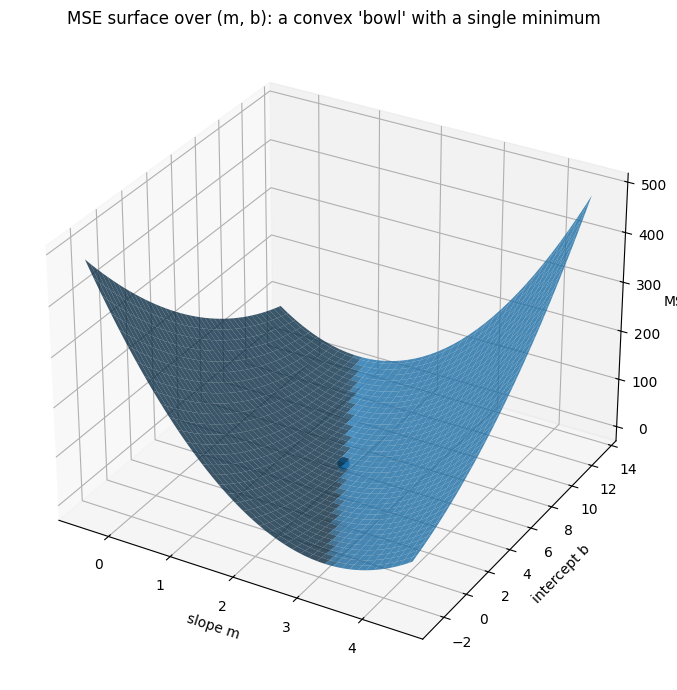

In [6]:

# MSE surface over (m, b): shows the convex 'bowl' with a single minimum
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

m_grid = np.linspace(m_hat - 2.5, m_hat + 2.5, 80)
b_grid = np.linspace(b_hat - 8.0, b_hat + 8.0, 80)
M, B = np.meshgrid(m_grid, b_grid)

# Compute MSE for each (m, b) pair
MSE = np.empty_like(M)
for i in range(M.shape[0]):
    b_row = B[i, :]
    preds = (X[:, None] * M[i, :][None, :]) + b_row[None, :]
    MSE[i, :] = np.mean((y[:, None] - preds)**2, axis=0)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, MSE, rstride=2, cstride=2, alpha=0.8, linewidth=0)
ax.set_xlabel("slope m")
ax.set_ylabel("intercept b")
ax.set_zlabel("MSE")
ax.set_title("MSE surface over (m, b): a convex 'bowl' with a single minimum")

# Mark the OLS minimum
min_point_m = m_hat
min_point_b = b_hat
min_point_mse = np.mean((y - (min_point_m*X + min_point_b))**2)
ax.scatter(min_point_m, min_point_b, min_point_mse, s=60)

plt.tight_layout()
plt.show()


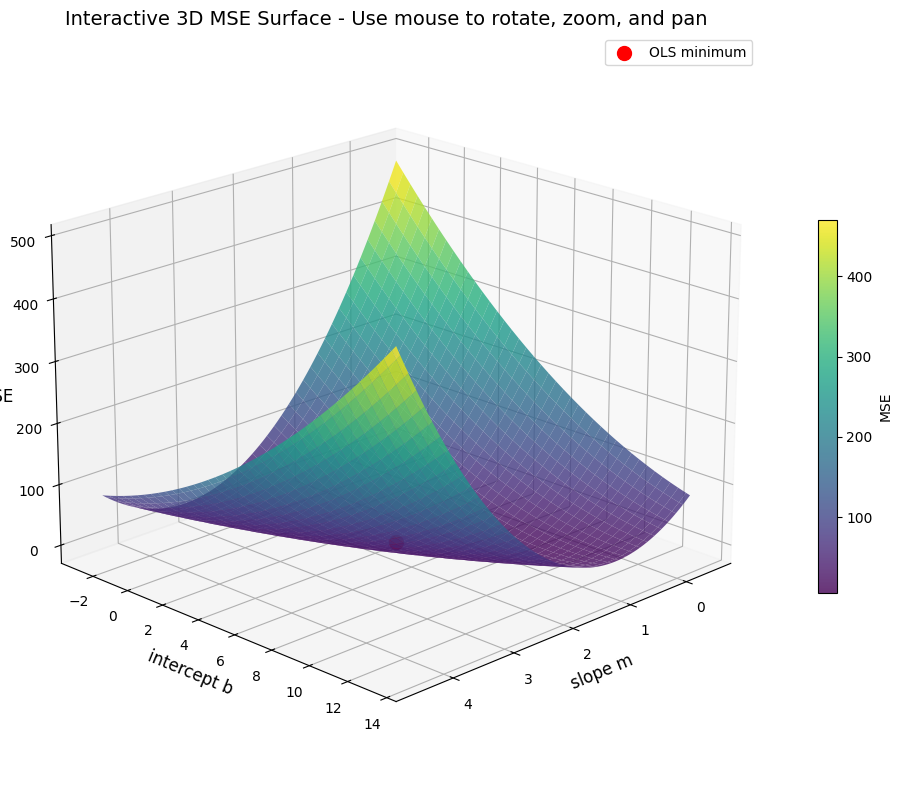

🎯 Interactive Controls:
• Left mouse button + drag: Rotate the view
• Right mouse button + drag: Zoom in/out
• Middle mouse button + drag: Pan the view
• Scroll wheel: Zoom in/out


In [7]:
# Interactive 3D plot with mouse rotation controls
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the same MSE surface data
m_grid = np.linspace(m_hat - 2.5, m_hat + 2.5, 80)
b_grid = np.linspace(b_hat - 8.0, b_hat + 8.0, 80)
M, B = np.meshgrid(m_grid, b_grid)

# Compute MSE for each (m, b) pair
MSE = np.empty_like(M)
for i in range(M.shape[0]):
    b_row = B[i, :]
    preds = (X[:, None] * M[i, :][None, :]) + b_row[None, :]
    MSE[i, :] = np.mean((y[:, None] - preds)**2, axis=0)

# Interactive 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(M, B, MSE, rstride=2, cstride=2, alpha=0.8, 
                         cmap='viridis', linewidth=0)

# Mark the OLS minimum
min_point_m = m_hat
min_point_b = b_hat
min_point_mse = np.mean((y - (min_point_m*X + min_point_b))**2)
ax.scatter(min_point_m, min_point_b, min_point_mse, s=100, color='red', label='OLS minimum')

# Set labels and title
ax.set_xlabel("slope m", fontsize=12)
ax.set_ylabel("intercept b", fontsize=12)
ax.set_zlabel("MSE", fontsize=12)
ax.set_title("Interactive 3D MSE Surface - Use mouse to rotate, zoom, and pan", fontsize=14)

# Add colorbar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=20, label='MSE')

# Set initial viewing angle
ax.view_init(elev=20, azim=45)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

print("🎯 Interactive Controls:")
print("• Left mouse button + drag: Rotate the view")
print("• Right mouse button + drag: Zoom in/out")
print("• Middle mouse button + drag: Pan the view")
print("• Scroll wheel: Zoom in/out")


🎬 Creating animated rotation...
⏱️  This may take a moment to render...


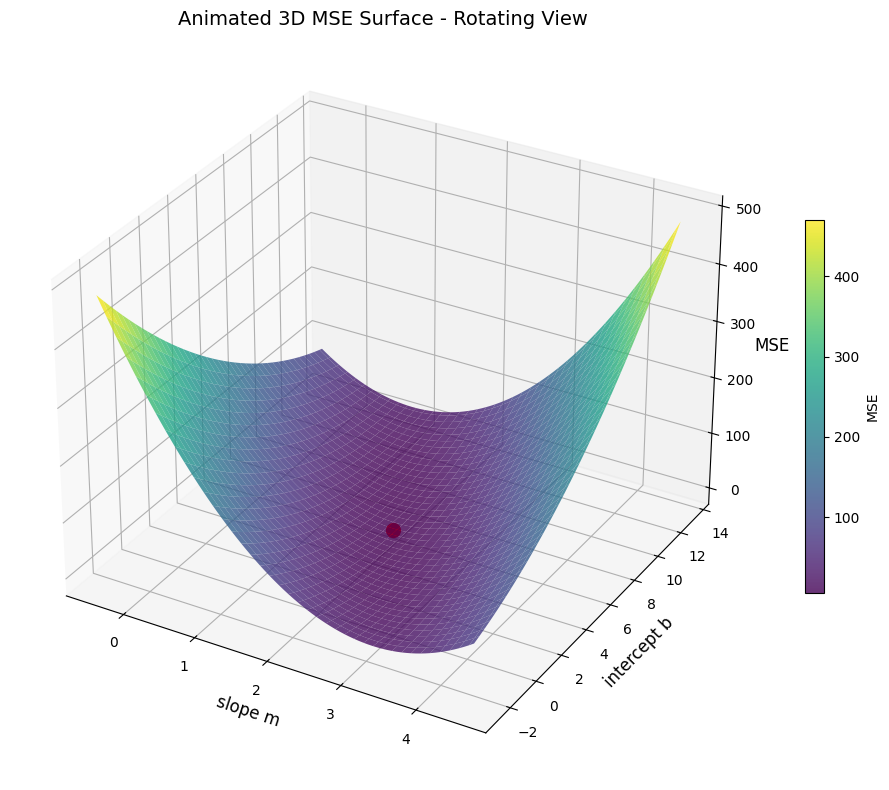

🎯 Animation Controls:
• The plot will automatically rotate 360 degrees
• Animation repeats continuously
• You can still interact with the plot while it's animating


In [10]:
# Animated 3D rotation of the MSE surface
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

# Create figure for animation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface (same data as before)
surface = ax.plot_surface(M, B, MSE, rstride=2, cstride=2, alpha=0.8, 
                         cmap='viridis', linewidth=0)

# Mark the OLS minimum
ax.scatter(min_point_m, min_point_b, min_point_mse, s=100, color='red', label='OLS minimum')

# Set labels and title
ax.set_xlabel("slope m", fontsize=12)
ax.set_ylabel("intercept b", fontsize=12)
ax.set_zlabel("MSE", fontsize=12)
ax.set_title("Animated 3D MSE Surface - Rotating View", fontsize=14)

# Add colorbar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=20, label='MSE')

# Animation function
def animate(frame):
    # Rotate the view by changing the azimuth angle
    ax.view_init(elev=20, azim=frame)
    return []

# Create animation
print("🎬 Creating animated rotation...")
print("⏱️  This may take a moment to render...")

# Create the animation (360 degrees rotation, 2 degrees per frame)
anim = FuncAnimation(fig, animate, frames=range(0, 360, 2), 
                    interval=50, blit=False, repeat=True)

# Display the animation
plt.tight_layout()
plt.show()

print("🎯 Animation Controls:")
print("• The plot will automatically rotate 360 degrees")
print("• Animation repeats continuously")
print("• You can still interact with the plot while it's animating")


/Users/makingmusic/code/ml101/myenv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


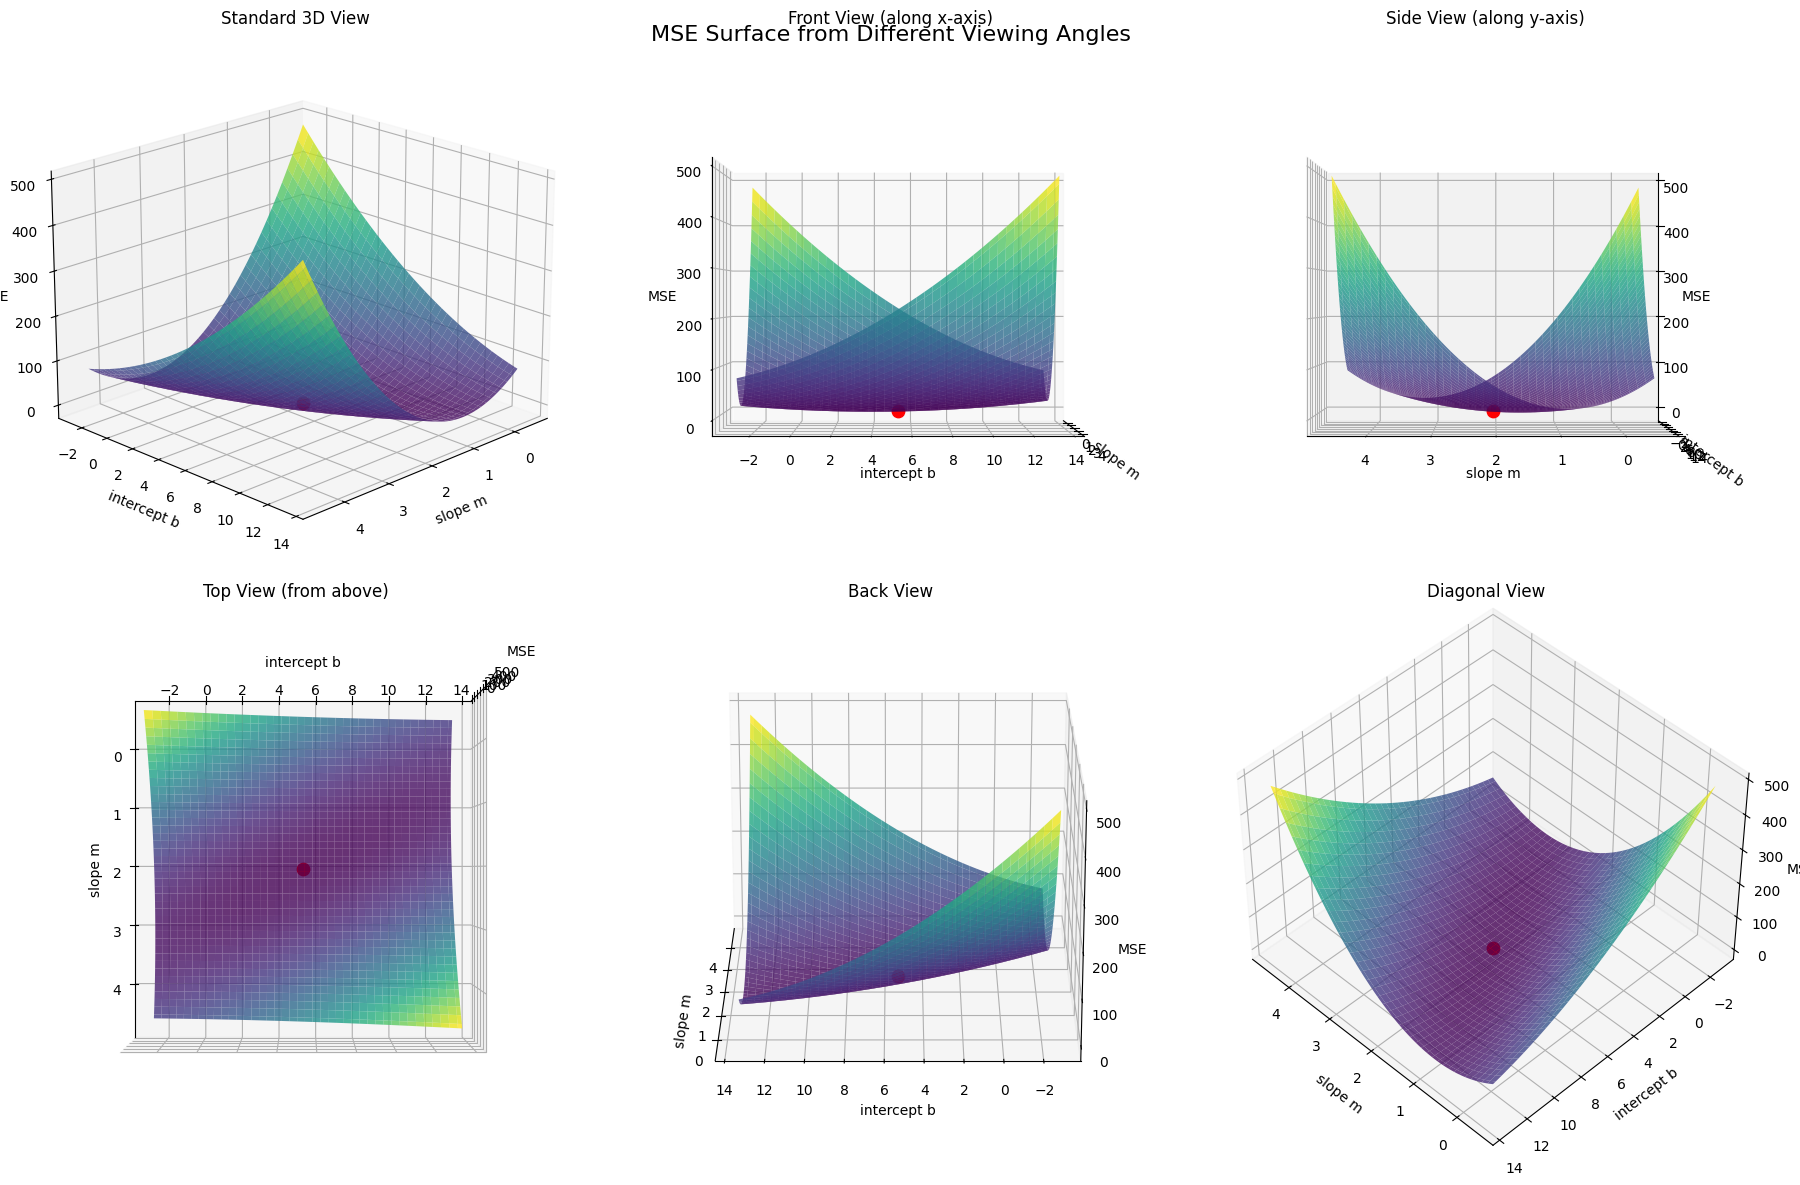

🎯 Multiple Viewing Angles:
• Each subplot shows the same MSE surface from a different perspective
• This helps you understand the 3D structure of the error surface
• Notice how the 'bowl' shape is most apparent in the standard 3D view
• The top view shows the contour lines of the MSE surface


In [11]:
# Multiple preset viewing angles for different perspectives
fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw={'projection': '3d'})
axes = axes.flatten()

# Define different viewing angles (elevation, azimuth)
view_angles = [
    (20, 45),    # Standard 3D view
    (0, 0),      # Front view (looking along x-axis)
    (0, 90),     # Side view (looking along y-axis)
    (90, 0),     # Top view (looking down from above)
    (20, 180),   # Back view
    (45, 135),   # Diagonal view
]

view_names = [
    "Standard 3D View",
    "Front View (along x-axis)",
    "Side View (along y-axis)", 
    "Top View (from above)",
    "Back View",
    "Diagonal View"
]

# Create the same surface for each subplot
for i, (elev, azim) in enumerate(view_angles):
    ax = axes[i]
    
    # Plot the surface
    surface = ax.plot_surface(M, B, MSE, rstride=2, cstride=2, alpha=0.8, 
                             cmap='viridis', linewidth=0)
    
    # Mark the OLS minimum
    ax.scatter(min_point_m, min_point_b, min_point_mse, s=80, color='red')
    
    # Set labels
    ax.set_xlabel("slope m", fontsize=10)
    ax.set_ylabel("intercept b", fontsize=10)
    ax.set_zlabel("MSE", fontsize=10)
    ax.set_title(view_names[i], fontsize=12)
    
    # Set the viewing angle
    ax.view_init(elev=elev, azim=azim)

plt.suptitle("MSE Surface from Different Viewing Angles", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

print("🎯 Multiple Viewing Angles:")
print("• Each subplot shows the same MSE surface from a different perspective")
print("• This helps you understand the 3D structure of the error surface")
print("• Notice how the 'bowl' shape is most apparent in the standard 3D view")
print("• The top view shows the contour lines of the MSE surface")


/var/folders/yh/k8nfk6q96jd34hfrrlp6x6d40000gn/T/ipykernel_49675/2866739617.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


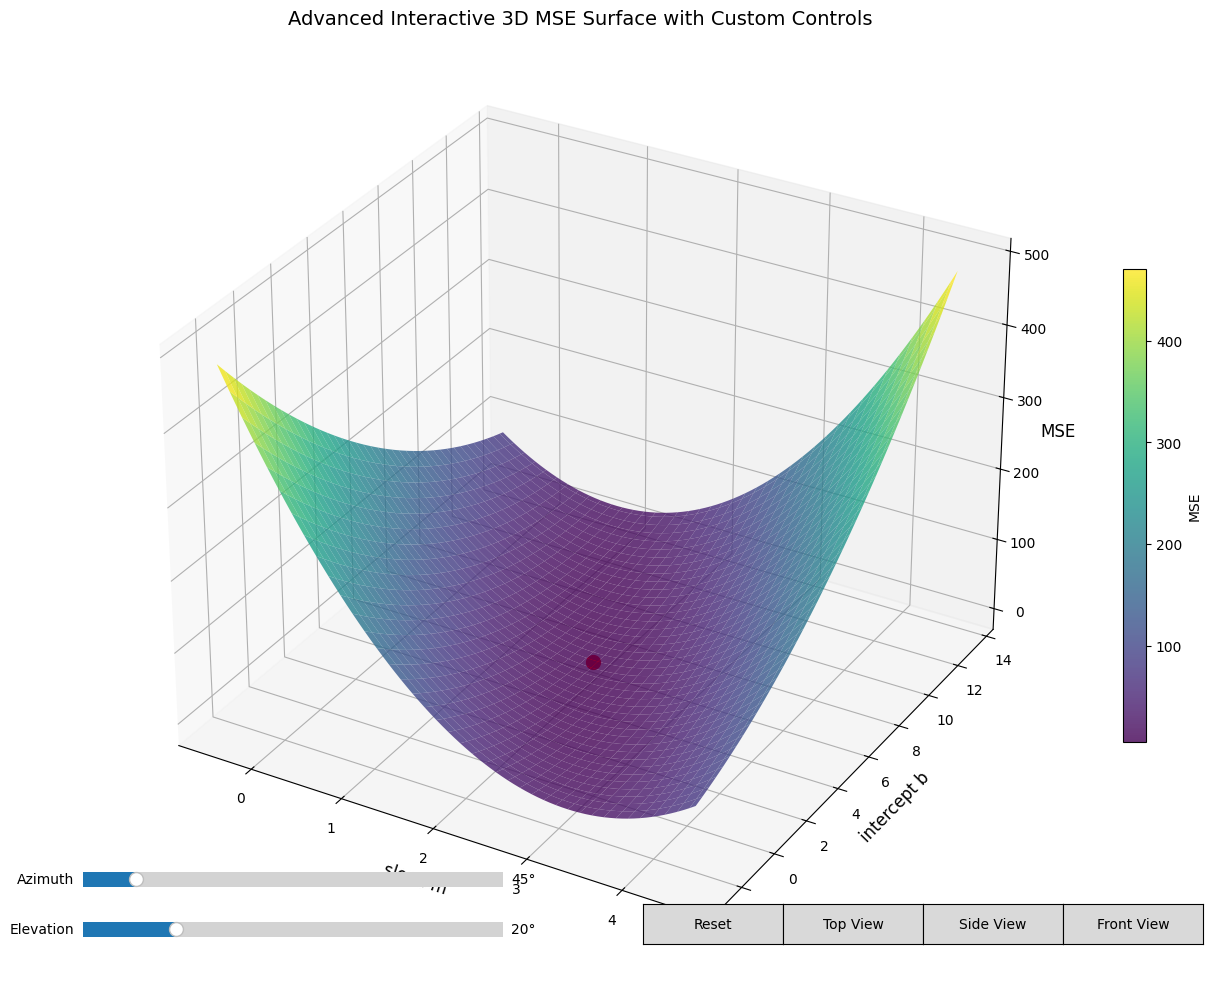

🎯 Advanced Interactive Controls:
• Use the sliders to precisely control elevation and azimuth angles
• Click the preset buttons for quick view changes
• You can still use mouse controls for real-time interaction
• The sliders show the exact angle values


In [12]:
# Advanced: Interactive plot with custom viewing controls
from matplotlib.widgets import Slider, Button
import matplotlib.pyplot as plt

# Create figure with subplots for the 3D plot and controls
fig = plt.figure(figsize=(14, 10))

# Main 3D plot
ax_3d = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax_3d.plot_surface(M, B, MSE, rstride=2, cstride=2, alpha=0.8, 
                           cmap='viridis', linewidth=0)

# Mark the OLS minimum
ax_3d.scatter(min_point_m, min_point_b, min_point_mse, s=100, color='red', label='OLS minimum')

# Set labels and title
ax_3d.set_xlabel("slope m", fontsize=12)
ax_3d.set_ylabel("intercept b", fontsize=12)
ax_3d.set_zlabel("MSE", fontsize=12)
ax_3d.set_title("Advanced Interactive 3D MSE Surface with Custom Controls", fontsize=14)

# Add colorbar
fig.colorbar(surface, ax=ax_3d, shrink=0.5, aspect=20, label='MSE')

# Create control sliders
ax_elev = plt.axes([0.1, 0.05, 0.3, 0.03])
ax_azim = plt.axes([0.1, 0.1, 0.3, 0.03])

slider_elev = Slider(ax_elev, 'Elevation', 0, 90, valinit=20, valfmt='%d°')
slider_azim = Slider(ax_azim, 'Azimuth', 0, 360, valinit=45, valfmt='%d°')

# Update function for sliders
def update_view(val):
    elev = slider_elev.val
    azim = slider_azim.val
    ax_3d.view_init(elev=elev, azim=azim)
    fig.canvas.draw()

# Connect sliders to update function
slider_elev.on_changed(update_view)
slider_azim.on_changed(update_view)

# Add preset view buttons
ax_reset = plt.axes([0.5, 0.05, 0.1, 0.04])
ax_top = plt.axes([0.6, 0.05, 0.1, 0.04])
ax_side = plt.axes([0.7, 0.05, 0.1, 0.04])
ax_front = plt.axes([0.8, 0.05, 0.1, 0.04])

button_reset = Button(ax_reset, 'Reset')
button_top = Button(ax_top, 'Top View')
button_side = Button(ax_side, 'Side View')
button_front = Button(ax_front, 'Front View')

# Button functions
def reset_view(event):
    slider_elev.reset()
    slider_azim.reset()
    ax_3d.view_init(elev=20, azim=45)
    fig.canvas.draw()

def top_view(event):
    slider_elev.set_val(90)
    slider_azim.set_val(0)
    ax_3d.view_init(elev=90, azim=0)
    fig.canvas.draw()

def side_view(event):
    slider_elev.set_val(0)
    slider_azim.set_val(90)
    ax_3d.view_init(elev=0, azim=90)
    fig.canvas.draw()

def front_view(event):
    slider_elev.set_val(0)
    slider_azim.set_val(0)
    ax_3d.view_init(elev=0, azim=0)
    fig.canvas.draw()

# Connect buttons
button_reset.on_clicked(reset_view)
button_top.on_clicked(top_view)
button_side.on_clicked(side_view)
button_front.on_clicked(front_view)

plt.tight_layout()
plt.show()

print("🎯 Advanced Interactive Controls:")
print("• Use the sliders to precisely control elevation and azimuth angles")
print("• Click the preset buttons for quick view changes")
print("• You can still use mouse controls for real-time interaction")
print("• The sliders show the exact angle values")
